<table>
 <tr align=left><td><img align=left src="https://mirrors.creativecommons.org/presskit/buttons/80x15/png/by.png">
 <td>This notebook is provided under the Creative Commons Attribution license, CC-BY 4.0. All code is made available under MIT License (c) Arash Sarshar.</td>
 <td> </td>
</table>

## Some ground rules for writing good responses in your assignments

* Make sure that you provide ample comments to communicate what you are trying to do clearly. Do not assume that anyone reading the code would immediately  understand the context.
* If you need to create new variables, think about naming them in descriptive ways.
* Each and every output should be reproducible. If you are creating a plot, make sure you include the code for that plot.
* Cite your references, including AI ones.


## Let's load the lemon picture again

In [67]:
import numpy as np
from numpy.linalg import *
from PIL import Image
import matplotlib.pyplot as plt

PIL stands for Python Imaging Library, and it provides the necessary tools and functions for handling images in Python. It is used for image processing, manipulation, and analysis.

In [68]:
#Starting with loading images
image = np.array(Image.open('../images/lemon.jpeg'))

## Part 1

Write a block of commands that does the following.  

1. Print the shape of the image
1. Create a new variable called `img_single_channel` that is equivalent to __the last color channel__ of `image`
3. Print the shape of `img_single_channel` to check that it has the same number of pixels as the original image
4. Use `plt.imshow` to plot  `img_single_channel`





In [69]:
#printing the shape of image
image.shape

(100, 100, 3)

In [70]:
#Taking out the last color channel from RGB channel by slicing taking -1 (backwards)
img_single_channel = image[:, :, -1]

In [71]:
#shape of single channel image
img_single_channel.shape

(100, 100)

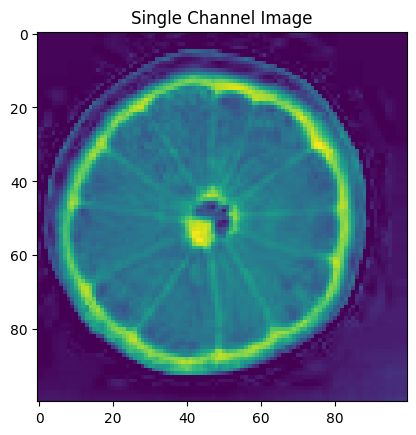

In [72]:
#plotting the image of single channel showing last color channel
plt.imshow(img_single_channel)
plt.title("Single Channel Image")
plt.show()

## Part 2

Write a block of commands that does the following.  

1. Create a new variable called `img_average_channel` that is equivalent to __the average of all three color channels__ of `image`
3. Print the shape of `img_average_channel` to check that it has the same number of pixels as the original image
4. Use `plt.imshow` to plot  the original image in `image`, compare the result with the result of `Part 1`, and comment on the differences and which one you would say is better

In [73]:
#creating variable having average of 3 color channels
img_average_channel = np.mean(image, axis=2)

In [74]:
#shape of average channel image
img_average_channel.shape

(100, 100)

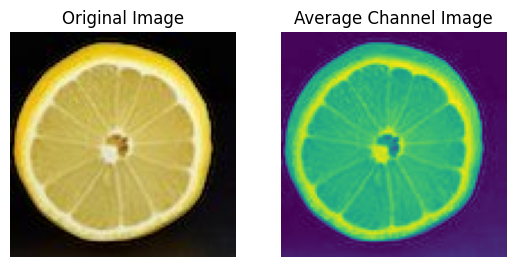

In [75]:
#Plotting original image with average channel image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

# Displaying img_average_channel using cmap='viridis'
plt.subplot(1, 2, 2)
plt.imshow(img_average_channel)
plt.title("Average Channel Image")
plt.axis('off')

plt.show()

## Part 3

1. Describe what an identity matrix is. What does multiplying with an identity matrix do?
1. Create an identity matrix called `identity_matrix` that has the same size as `img_average_channel`.
2. Print a random row out of `identity_matrix` and describe your observations.

An identity matrix, often denoted as "I" or "I_n" is a type of square matrix in which all the diagonal elements are equal to 1, and all the other elements are equal to 0. In mathematical notation, an identity matrix of size "n" is represented as:

I_n = | 1 0 0 ... 0 |
| 0 1 0 ... 0 |
| 0 0 1 ... 0 |
| 0 0 0 ... 1 |
| 0 0 0 ... 0 |
| 0 0 0 ... 0 |
...

When you multiply any matrix by an identity matrix of the appropriate size, it doesn't change the original matrix. In other words, if you have a matrix A of size (m x n) and multiply it by the identity matrix I_n (where n is the number of columns in matrix A), the result will be matrix A itself:

A x I_n = A

In [76]:
N = img_average_channel.shape[0]

In [77]:
#Creating identity matrix having same size as average channel img
identity_matrix = np.eye(N)

In [78]:
#Printing random row out of the identity matrix
random_row_index = np.random.randint(0, N)
print("Random Row from Identity Matrix:")
print(identity_matrix[random_row_index, :])
#It can be seen that being a row from identity matrix it has most of them 0's and a single 1

Random Row from Identity Matrix:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


## Part 4

We are going to use `identity_matrix` to scramble the rows and columns of `img_average_channel`.

1. First, create a numpy array that contains the numbers $0,1, \cdots, N$ where $N$ is the number of rows in the image.

2. Use `numpy.random.shuffle` to shuffle the indices. Call the shuffled array, `rows`

4. Print `rows` and inspect the elements.

In [79]:
rows = np.arange(N)

In [80]:
#shuffle row indices
np.random.shuffle(rows)

In [81]:
#Printing these rows
print("Shuffled Rows:", rows)

Shuffled Rows: [75 19 79 42 53 27 40 70 67 45  4 94 16  2 55 25 96 65 76 99 11 71 29 88
 31  8 56  7 33 97  9 63  3 21 13 26 10 14 46 78 95 80 23 50 77 57 83 20
 49 44 85 87 90 66 39 35 36 62 12 52  6 69  0 37 89 68 17 98 86 22  5 93
 51 18 54  1 48 47 81 91 74 15 30 38 58 59 60 82 24 41 43 64 32 92 73 84
 72 28 34 61]


## Part 5

1. Use your array of random row indices to create a new matrix `T` from `identity_matrix`. Overall, `T` has the same elements as `identity_matrix`, but the order of the rows of `T` should be according to the variable `rows`
2. Take a moment to think about what we are doing here. Describe in your own words what matrix `T` is.
3. Sanity check, print the shape of `T` and make sure it is the same size as `identity_matrix` and `img_average_channel`. If you need to,  reshape it to have the same size.


In [82]:
#Creating matrix T by rearranging rows in identity_matrix
T = identity_matrix[rows]

Here matrix T is an identity matrix that has been scrambled in its row order. Each row in T corresponds to the row of the original identity matrix but in a different order, as determined by the 'rows' array.

In [83]:
T = T.reshape(identity_matrix.shape)

In [84]:
#Again checking the shape of T
print("Shape of T:", T.shape)

Shape of T: (100, 100)


## Part 6

1. Matrix multiply `T` and `img_average_channel` and store the result in `transformed_image`. Check the shape of the result.
2. Plot `transformed_image` and describe the pattern you see.
3. Think about what each dot product in the matrix multiplication is doing. Describe in your own words what this transformation is doing to the original image.

In [85]:
#Matrix multiplication of matrix T and img_average_channel
transformed_image = np.matmul(T, img_average_channel)

In [86]:
print("Shape of transformed_image:", transformed_image.shape)

Shape of transformed_image: (100, 100)


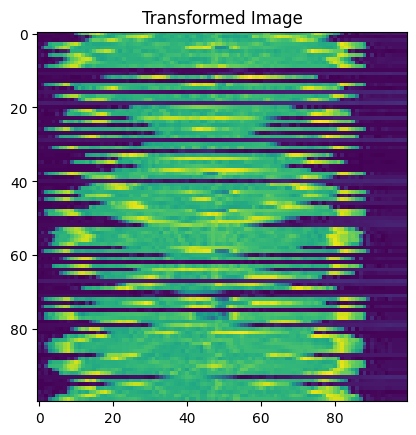

In [87]:
#Plotting transformed image
plt.imshow(transformed_image)
plt.title("Transformed Image")
plt.show()

#Here during the transformation we are rearranging the rows based on the order specified by matrix T, resulting in a scrambled appearance.

## Part 7

1. We now want to retrieve the original image. Is matrix `T` invertible? How would you show that it is invertible?
2. Compute the inverse and store the matrix in `Tinv`.
3. Perform the inverse of the scrambling operation and plot the result to show that you retrieved the original image.

In [88]:
determinant_T = np.linalg.det(T)

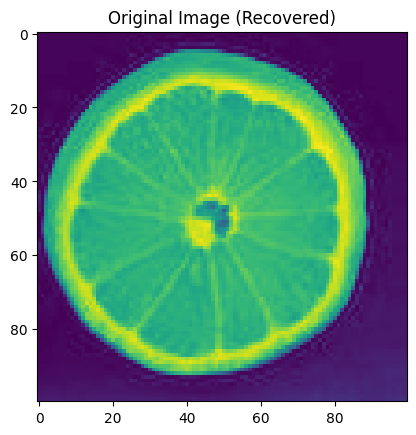

In [89]:
if determinant_T != 0:
    # Compute the inverse of T
    Tinv = np.linalg.inv(T)

    # Perform the inverse operation to retrieve the original image
    original_image = np.matmul(Tinv, transformed_image)

    # Plot the retrieved original image
    plt.imshow(original_image)
    plt.title("Original Image (Recovered)")
    plt.show()
else:
    print("Matrix T is not invertible.")

#The code checks if matrix T is invertible by calculating its determinant.
#If T is invertible (determinant is not zero), it computes the inverse of T and uses it to
#reverse a scrambling operation applied to the image. The original image is then displayed.
#If T is not invertible (determinant is zero), it indicates that the operation cannot be reversed,
#and the original image cannot be retrieved.

## Part 8: Extra Points

* We want to perform the same operations but on the columns of the original image. How would you do the matrix algebra? Plot the scrambled image for the proof of concept.


In [90]:
image_transposed = np.transpose(image, axes=(1, 0, 2))


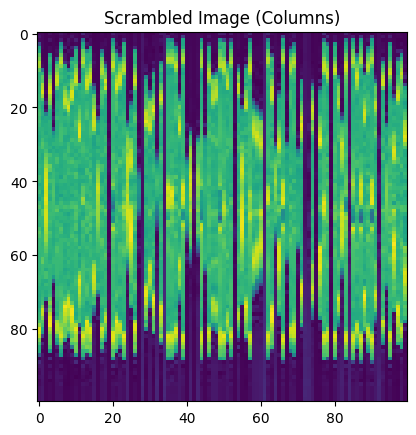

In [91]:
#To perform matrix algebra on the columns of the original image,
#we need to create a permutation matrix for the columns and then apply the same logic as before but with the columns.

# Transposing T to match the transposed image
T_transposed = np.transpose(T)

# Matrix multiplication of T_transposed and img_average_channel (now img_average_column)
transformed_image_column = np.matmul(T_transposed, img_average_channel)

# Transposing the result back to its original shape
transformed_image_column = np.transpose(transformed_image_column)

# Plotting the scrambled image
plt.imshow(transformed_image_column)
plt.title("Scrambled Image (Columns)")
plt.show()

## Extra Points

* Now can you perform the scrambling on __both the columns and rows__ of the original image?  Write the code and plot the scrambled image. Then invert the operations and show that you can recover the original image.

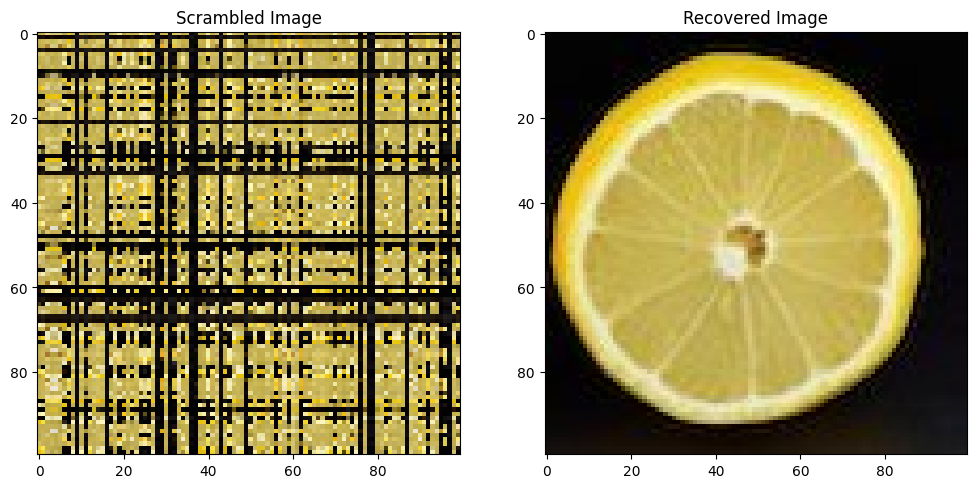

In [94]:
# Shuffling both row and column indices now
rows = np.arange(image.shape[0])
columns = np.arange(image.shape[1])
np.random.shuffle(rows)
np.random.shuffle(columns)

# Creating permutation matrices for rows and columns
perm_matrix_rows = np.eye(image.shape[0])[rows]
perm_matrix_columns = np.eye(image.shape[1])[columns]

# Scrambling each color channel using both row and column permutation matrices
scrambled_image = np.zeros_like(image)
for channel in range(3):
    scrambled_image[:, :, channel] = np.dot(np.dot(perm_matrix_rows, image[:, :, channel]), perm_matrix_columns.T)

# Inverting the operations to recover the original image
perm_matrix_rows_inv = np.linalg.inv(perm_matrix_rows)
perm_matrix_columns_inv = np.linalg.inv(perm_matrix_columns)
recovered_image = np.zeros_like(image)
for channel in range(3):
    recovered_image[:, :, channel] = np.dot(np.dot(perm_matrix_rows_inv, scrambled_image[:, :, channel]), perm_matrix_columns_inv.T)

# Plotting the scrambled and recovered images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(scrambled_image.astype(np.uint8))
plt.title('Scrambled Image')

plt.subplot(1, 2, 2)
plt.imshow(recovered_image.astype(np.uint8))
plt.title('Recovered Image')

plt.show()